**Рассмотрим простой пример с градиентным бустингом над решающими деревьями.**

Будем решать задачу регрессии на игрушечном примере.

У нас будет три итерации, то есть три последовательно построенных дерева. Будем использовать среднекватратичную функцию потерь. Глубина каждого дерева равна 2. После каждого дерева будем строить график приближения общего алгоритма и базового алгоритма. На печать будем выводить остатки.

In [193]:
from sklearn import tree, model_selection
from sklearn.metrics import accuracy_score

import pandas as pd

import numpy as np

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

In [194]:
# сформируем игрушечный датасет - продажи магазина в зависимости от времени года

toy_dataset = pd.DataFrame({
    'mounth': [1,2,3,4,5,6,7,8,9,10,11,12],
    'sales': [3.2,3.8,4.1,5.2,7.8,7.2,6.9,6.8,3.9,3.5,3.3,2.6]
})

# напечатаем, проверив что все получилос как надо
toy_dataset

,mounth,sales
0,1,3.2
1,2,3.8
2,3,4.1
3,4,5.2
4,5,7.8
5,6,7.2
6,7,6.9
7,8,6.8
8,9,3.9
9,10,3.5


In [208]:
# разобьем датасет на признаковое пространство и целевые значения
x_data = np.array(toy_dataset['mounth'])
y = np.array(toy_dataset['sales'])

# напечатаем, проверим что все получилось как надо
print x_data
print x_data.shape
x_data = x_data.reshape(12,1)
print x_data.shape
print y
print y.shape

[ 1  2  3  4  5  6  7  8  9 10 11 12]
(12L,)
(12L, 1L)
[3.2 3.8 4.1 5.2 7.8 7.2 6.9 6.8 3.9 3.5 3.3 2.6]
(12L,)


In [209]:
# инициализируем модель регрессии - Дерево решений
model = tree.DecisionTreeRegressor(max_depth = 2)

**Шаг 1.** Инициализируем градиентный бустинг (GBM) вектором ответов с нулевыми значениями. На самом деле в нашем случае, поскольку мы не пишем циклов, этот шаг можно было бы пропустить. Но для проформы мы его оставим.

Остатки считаются обычным вычитанием прогнозных значений из значений истинных ответов, так как функция потерь используется MSE. Производная от MSE дает именно такой результат.

Вектор ответов дерева №1: [4.1, 4.1, 4.1, 4.1, 7.2, 7.2, 7.2, 7.2, 3.6, 3.6, 3.6, 2.6]


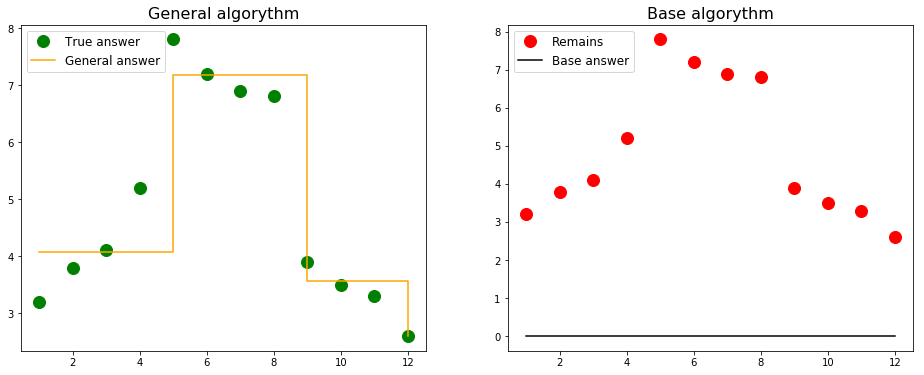

MSE: 2.902


In [210]:
# вектор ответов для запуска градиентного бустинга
init_predict = np.zeros((12))

# расчитаем остатки для обучения первого дерева
remains_1 = y - init_predict

# обучим первое дерево
tree_1 = model.fit(x_data, remains_1)

# выведем вектор ответов дерева
predict_1_tree = tree_1.predict(x_data)
print 'Вектор ответов дерева №1:', map(lambda x: round(x,1), predict_1_tree)

# построим график приближения на 1-й итерации
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
ax1.plot(x_data, y, 'o', color = 'green', markersize = 12, label = 'True answer')
ax1.step(x_data, predict_1_tree, color = 'orange', where = 'post', label = 'General answer')
ax1.legend(loc=2, prop={'size': 12})
ax1.set_title('General algorythm', size = 16)
ax2.plot(x_data, y, 'o', color = 'red', markersize = 12, label = 'Remains')
ax2.step(x_data, init_predict, color = 'black', where = 'post', label = 'Base answer')
ax2.legend(loc=2, prop={'size': 12})
ax2.set_title('Base algorythm', size = 16)
plt.show()

mse_1 = (y - init_predict - predict_1_tree)**2
print 'MSE:', round(sum(mse_1), 3)

**Шаг 2.** Совершим вторую итерацию. Обучим второе дерево на остатках от прогнозов первого дерева.

Вектор остатков (ошибок): [-0.4, -0.1, 0.0, 0.6, 0.3, 0.0, -0.1, -0.2, 0.2, -0.0, -0.1, 0.0]
Вектор ответов дерева №2: [-0.4, 0.2, 0.2, 0.2, 0.2, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
Вектор ответов общего алгоритма: [3.6, 4.3, 4.3, 4.3, 7.4, 7.1, 7.1, 7.1, 3.5, 3.5, 3.5, 2.6]


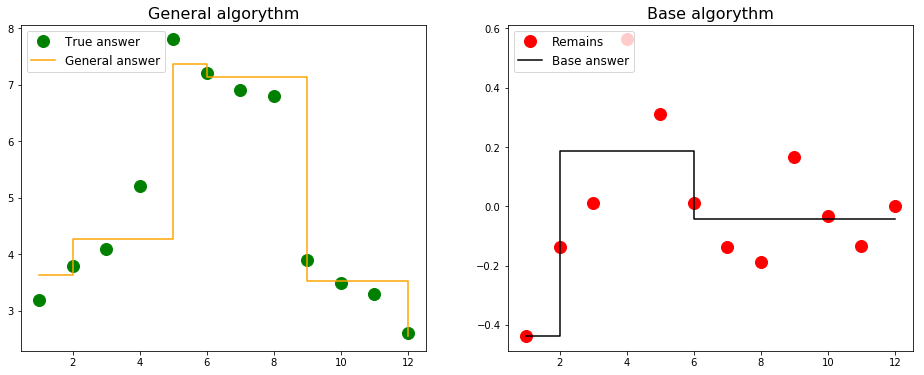

MSE: 1.864


In [211]:
# расчитаем остатки derivative loss function MSE:
remains_2 = y - init_predict - predict_1_tree
remains_2 = 0.5 * remains_2
print 'Вектор остатков (ошибок):', map(lambda x: round(x,1), remains_2)

# построем дерево №2 на остатках
tree_2 = model.fit(x_data, remains_2)

# расчитаем вектор ответов дерева №2
predict_2_tree = tree_2.predict(x_data)
print 'Вектор ответов дерева №2:', map(lambda x: round(x,1), predict_2_tree)

# расчитаем вектор ответов общего алгоритма на двух деревьях
general_predict_2 = predict_1_tree + predict_2_tree
print 'Вектор ответов общего алгоритма:', map(lambda x: round(x, 1), general_predict_2)

# построим график приближения на 2-й итерации
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
ax1.plot(x_data, y, 'o', color = 'green', markersize = 12, label = 'True answer')
ax1.step(x_data, general_predict_2, color = 'orange', where = 'post', label = 'General answer')
ax1.legend(loc=2, prop={'size': 12})
ax1.set_title('General algorythm', size = 16)
ax2.plot(x_data, remains_2, 'o', color = 'red', markersize = 12, label = 'Remains')
ax2.step(x_data, predict_2_tree, color = 'black', where = 'post', label = 'Base answer')
ax2.legend(loc=2, prop={'size': 12})
ax2.set_title('Base algorythm', size = 16)
plt.show()

mse_2 = (y - general_predict_2)**2
print 'MSE:', round(sum(mse_2), 3)

**Шаг 3.** Последняя итерация

Вектор остатков (ошибок): [-0.2, -0.2, -0.1, 0.5, 0.2, 0.0, -0.1, -0.2, 0.2, -0.0, -0.1, 0.0]
Вектор ответов дерева №3: [-0.2, -0.2, -0.1, 0.3, 0.3, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
Вектор ответов общего алгоритма: [3.4, 4.0, 4.2, 4.6, 7.7, 7.1, 7.1, 7.1, 3.5, 3.5, 3.5, 2.5]


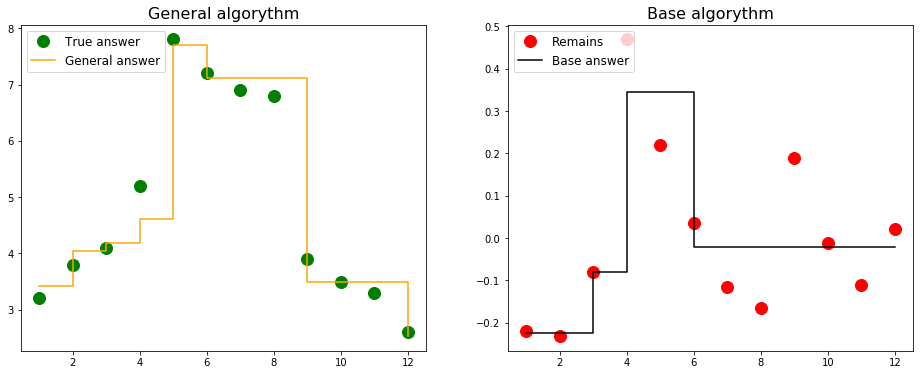

MSE: 0.821


In [212]:
# расчитаем остатки derivative loss function MSE:
remains_3 = y - general_predict_2
remains_3 = 0.5 * remains_3
print 'Вектор остатков (ошибок):', map(lambda x: round(x,1), remains_3)

# построем дерево №3 на остатках
tree_3 = model.fit(x_data, remains_3)

# расчитаем вектор ответов дерева №3
predict_3_tree = tree_3.predict(x_data)
print 'Вектор ответов дерева №3:', map(lambda x: round(x,1), predict_3_tree)

# расчитаем вектор ответов общего алгоритма на двух деревьях
general_predict_3 = general_predict_2 + predict_3_tree
print 'Вектор ответов общего алгоритма:', map(lambda x: round(x, 1), general_predict_3)

# построим график приближения на 2-й итерации
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
ax1.plot(x_data, y, 'o', color = 'green', markersize = 12, label = 'True answer')
ax1.step(x_data, general_predict_3, color = 'orange', where = 'post', label = 'General answer')
ax1.legend(loc=2, prop={'size': 12})
ax1.set_title('General algorythm', size = 16)
ax2.plot(x_data, remains_3, 'o', color = 'red', markersize = 12, label = 'Remains')
ax2.step(x_data, predict_3_tree, color = 'black', where = 'post', label = 'Base answer')
ax2.legend(loc=2, prop={'size': 12})
ax2.set_title('Base algorythm', size = 16)
plt.show()

mse_3 = (y - general_predict_3)**2
print 'MSE:', round(sum(mse_3), 3)

**Дополнения: код в несколько строчек**

Конечно же подобный код делает практически не осуществимым анализ 50, 100 или более итераций и тем более, это все будет очень сложно воспроизвести на тестовой выборке. Поэтому, мы перепишем этот огромный кусок кода в несколько строчек используя циклы и функции.

0 iteration 
MSE: 2.902


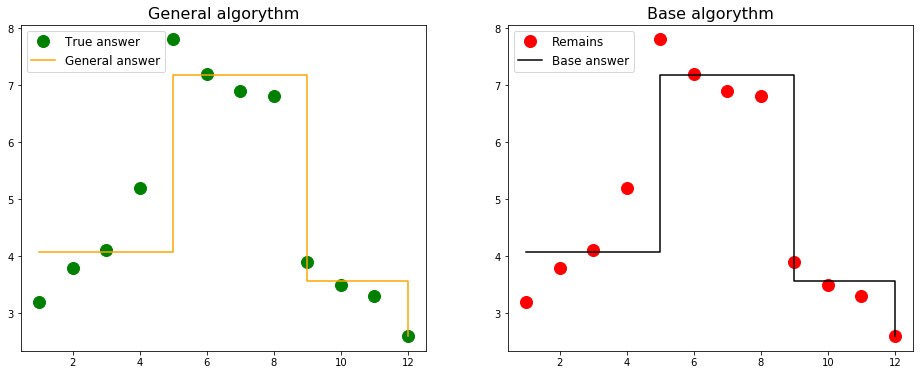

1 iteration 
MSE: 1.864


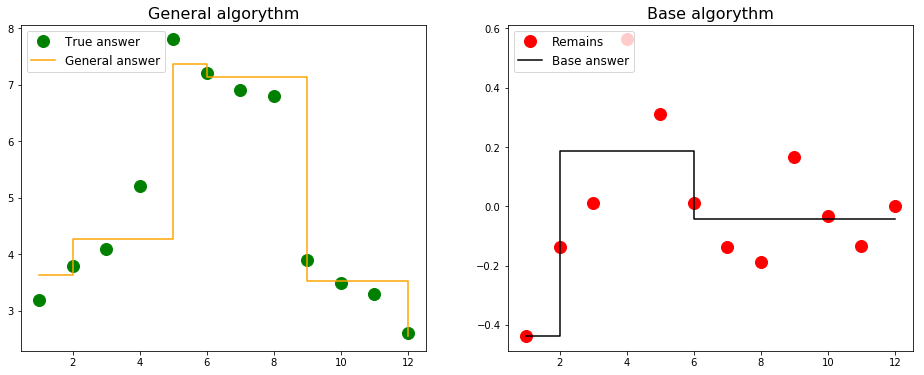

2 iteration 
MSE: 0.821


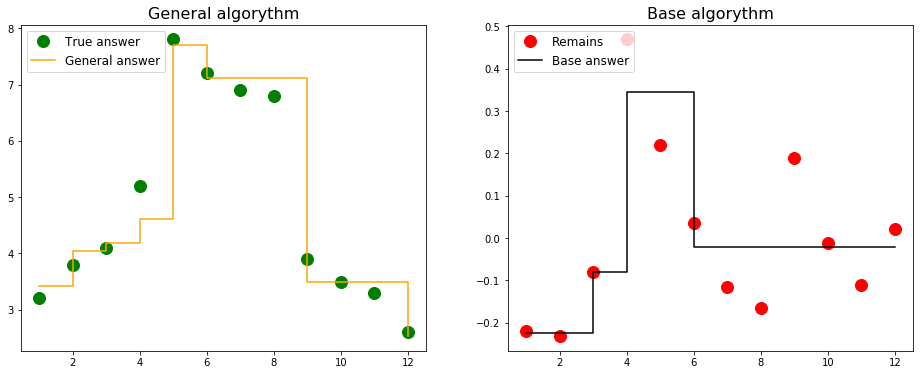

In [264]:
# инициализируем вектор ответов
init_predict = np.zeros((12))

# сформируем вектор остатков
remains = y - init_predict

# инициализируем модель решающего дерева для задачи регрессии
model = tree.DecisionTreeRegressor(max_depth = 2)

# подготовим лист коэффициентов
coef_list = [0.5, 0.5, 0.5]

# подготовим массив для базовых алгоритмов (требуется если он будет использоваться на тестовой выборке)
base_algorythm_list = []

# зададим вектор количества итераций
steps = np.arange(3)

# сформируем вспомогательный вектор ответов
predict_general = np.zeros((12))

# специально для построения графиков базовых алгоритмов сформируем листы остатков и предсказаний
graph_remains = []
graph_predict_base = []
graph_remains.append(remains)
graph_predict_base.append(init_predict)


# запустим градиентный бустинг
for i in steps:
    base_algorythm = model.fit(x_data, remains)
    base_algorythm_list.append(base_algorythm)
    predict_base = base_algorythm.predict(x_data)
    predict_general += predict_base
    remains = coef_list[i]*(y - predict_general)
    mse = (y - predict_general)**2
    print '\033[1m' + '%i iteration' %i, '\033[0m'
    print 'MSE:', round(sum(mse), 3)
    graph_remains.append(remains)
    graph_predict_base.append(predict_base)
    
    fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))
    ax1.plot(x_data, y, 'o', color = 'green', markersize = 12, label = 'True answer')
    ax1.step(x_data, predict_general, color = 'orange', where = 'post', label = 'General answer')
    ax1.legend(loc=2, prop={'size': 12})
    ax1.set_title('General algorythm', size = 16)
    ax2.plot(x_data, graph_remains[i], 'o', color = 'red', markersize = 12, label = 'Remains')
    ax2.step(x_data, graph_predict_base[i+1], color = 'black', where = 'post', label = 'Base answer')
    ax2.legend(loc=2, prop={'size': 12})
    ax2.set_title('Base algorythm', size = 16)
    plt.show()